# Data Cleaning -2

### 4. Handling Outliers

Outliers are extreme values that deviate significantly from the majority of the data. They can negatively impact the analysis and model performance. Techniques such as clustering, interpolation, or transformation can be used to handle outliers.

To check the outliers, We generally use a box plot. A box plot, also referred to as a box-and-whisker plot, is a graphical representation of a dataset’s distribution. 

It shows a variable’s median, quartiles, and potential outliers. The line inside the box denotes the median, while the box itself denotes the interquartile range (IQR). 

The whiskers extend to the most extreme non-outlier values within 1.5 times the IQR. Individual points beyond the whiskers are considered potential outliers. A box plot offers an easy-to-understand overview of the range of the data and makes it possible to identify outliers or skewness in the distribution.

In [1]:
import pandas as pd
 
url = 'https://raw.githubusercontent.com/chrisalbon/simulated_datasets/master/titanic.csv'
dataframe = pd.read_csv(url)
dataframe

,Name,PClass,Age,Sex,Survived,SexCode
0,"Allen, Miss Elisabeth Walton",1st,29.00,female,1,1
1,"Allison, Miss Helen Loraine",1st,2.00,female,0,1
2,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0,0
3,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0,1
4,"Allison, Master Hudson Trevor",1st,0.92,male,1,0
...,...,...,...,...,...,...
1308,"Zakarian, Mr Artun",3rd,27.00,male,0,0
1309,"Zakarian, Mr Maprieder",3rd,26.00,male,0,0
1310,"Zenni, Mr Philip",3rd,22.00,male,0,0
1311,"Lievens, Mr Rene",3rd,24.00,male,0,0


In [2]:
df1 = dataframe.drop(columns=['Name'])
df1.shape

(1313, 5)

In [3]:
round((df1.isnull().sum()/df1.shape[0])*100,2)

PClass       0.00
Age         42.42
Sex          0.00
Survived     0.00
SexCode      0.00
dtype: float64

In [4]:
# Mean imputation
df2 = df1.fillna(df1.Age.mean())
# Let's check the null values again
df2.isnull().sum()

PClass      0
Age         0
Sex         0
Survived    0
SexCode     0
dtype: int64

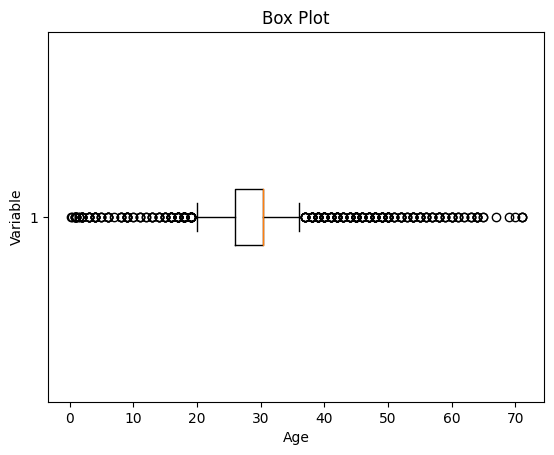

In [5]:
import matplotlib.pyplot as plt
 
plt.boxplot(df2['Age'], vert=False)
plt.ylabel('Variable')
plt.xlabel('Age')
plt.title('Box Plot')
plt.show()

In [6]:
# calculate summary statistics
mean = df2['Age'].mean()
std  = df2['Age'].std()
 
# Calculate the lower and upper bounds
lower_bound = mean - std*2
upper_bound = mean + std*2
 
print('Lower Bound :',lower_bound)
print('Upper Bound :',upper_bound)
 
# Drop the outliers
df3 = df2[(df2['Age'] >= lower_bound)
                & (df2['Age'] <= upper_bound)]

Lower Bound : 8.764473546191063
Upper Bound : 52.03150528978779


### 5. Data Transformation

Data transformation involves converting the data from one form to another to make it more suitable for analysis

In [7]:
X = df2[['PClass','Sex','Age','SexCode']]
Y = df2['Survived']

Data validation and verification: Data validation and verification involve ensuring that the data is accurate and consistent by comparing it with external sources or expert knowledge. 

Data formatting: Data formatting involves converting the data into a standard format or structure that can be easily processed by the algorithms or models used for analysis. Here we will discuss commonly used data formatting techniques i.e. Scaling and Normalization.

In [8]:
from sklearn.preprocessing import MinMaxScaler
 
# initialising the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
 
# Numerical columns
num_col_ = [col for col in X.columns if X[col].dtype != 'object']
x1 = X
# learning the statistical parameters for each of the data and transforming
x1[num_col_] = scaler.fit_transform(x1[num_col_])
x1.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_19980\3649388838.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x1[num_col_] = scaler.fit_transform(x1[num_col_])


,PClass,Sex,Age,SexCode
0,1st,female,0.407031,1.0
1,1st,female,0.025837,1.0
2,1st,male,0.421149,0.0
3,1st,female,0.350558,1.0
4,1st,male,0.010589,0.0


Standardization (Z-score scaling):

Standardization transforms the values to have a mean of 0 and a standard deviation of 1.

It centers the data around the mean and scales it based on the standard deviation.

Standardization makes the data more suitable for algorithms that assume a Gaussian distribution or require features to have zero mean and unit variance.

Z = (X - μ) / σ